In [65]:
import altair as alt
import pandas as pd
import glob, os
import spacy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.readwrite import json_graph
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.layouts import row, column
from bokeh.io import  output_notebook
import nltk
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)
import warnings
warnings.filterwarnings('ignore')

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from itertools import combinations 

In [67]:

df = pd.read_csv('../data/matrix_data_ner_congo.csv')
df_1 = pd.read_csv('../data/matrix_data_ner_congo_unique.csv')

In [68]:
df_grouped1 = df_1.groupby(['year', 'source', 'target']).size().reset_index()
df_grouped1.year = df_grouped1.year.astype(int)

df_grouped1.rename(columns={0: 'count'}, inplace=True)

df_grouped = df.groupby(['year', 'source', 'target']).size().reset_index()
df_grouped.year = df_grouped.year.astype(int)

df_grouped.rename(columns={0: 'count'}, inplace=True)

In [69]:
df_2 = df_grouped1
terms = df_2.source.unique()
frames = []
for term in terms:
    ti = df_2.loc[(df_2.source == term) | (df_2.target == term)]
    for i, r in ti.iterrows():
        d = {}
        d['source'] = term
        d['count'] = r['count']
        d['year'] = r.year
        if r.source != term:
            d['target'] = r.source
            
        else:
            d['target'] = r.target

        dm = pd.DataFrame().append(d, ignore_index=True)
        frames.append(dm)

dl2 = pd.concat(frames)
dm2 = dl2.groupby(['year', 'source', 'target'])['count'].sum().reset_index()


In [71]:
df_1 = df_grouped
terms = df_1.source.unique()
frames = []
for term in terms:
    ti = df_1.loc[(df_1.source == term) | (df_1.target == term)]
    for i, r in ti.iterrows():
        d = {}
        d['source'] = term
        d['count'] = r['count']
        d['year'] = r.year
        if r.source != term:
            d['target'] = r.source
            
        else:
            d['target'] = r.target

        dm = pd.DataFrame().append(d, ignore_index=True)
        frames.append(dm)


        
        
dl = pd.concat(frames)
dm = dl.groupby(['year', 'source', 'target'])['count'].sum().reset_index()



In [72]:
terms = ['patrice','congo','lumumba','tshombe','leopoldville','belgian','mobutu','kasavubu','katanga']

combos = list(combinations(terms, 2)) 
frames = []
for c in combos:
    term1, term2 = c
    da = dm.loc[(dm.source == term1) &  (dm.target == term2) |(dm.source == term2) &  (dm.target == term1) ]
    da['terms'] = da['source'] +'_'+da['target']
    t = da.drop_duplicates(subset=['year', 'count'], keep='first')
    frames.append(t)
all_combos = pd.concat(frames)

In [73]:
terms = ['patrice','congo','lumumba','tshombe','leopoldville','belgian','mobutu','kasavubu','katanga']

combos = list(combinations(terms, 2)) 
frames = []
for c in combos:
    term1, term2 = c
    da = dm2.loc[(dm2.source == term1) &  (dm2.target == term2) |(dm2.source == term2) &  (dm2.target == term1) ]
    da['terms'] = da['source'] +'_'+da['target']
    t = da.drop_duplicates(subset=['year', 'count'], keep='first')
    frames.append(t)
all_combos2 = pd.concat(frames)

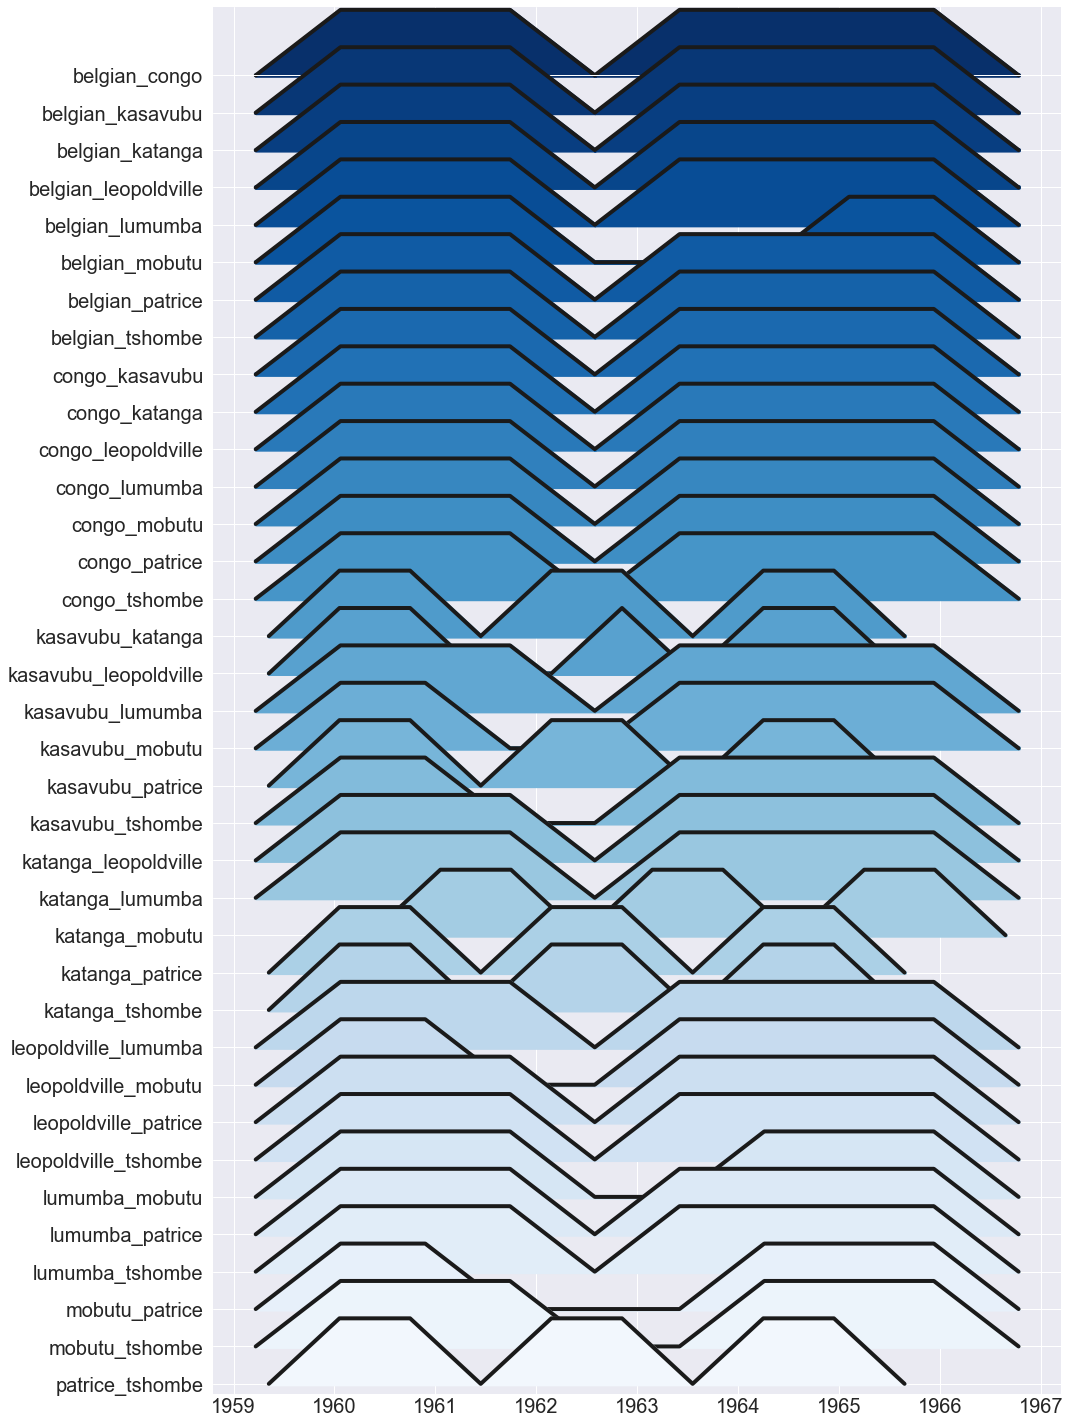

In [42]:
import joypy
from matplotlib import cm
%matplotlib inline

fig, axes = joypy.joyplot(all_combos, by='terms', column='year', kind='counts', range_style='own', figsize=(15,20), grid='both', overlap=1, ylabelsize=20, xlabelsize=20, colormap=cm.Blues_r, linewidth=4)

In [43]:
fig.savefig('joyplot_raw_freq.png')

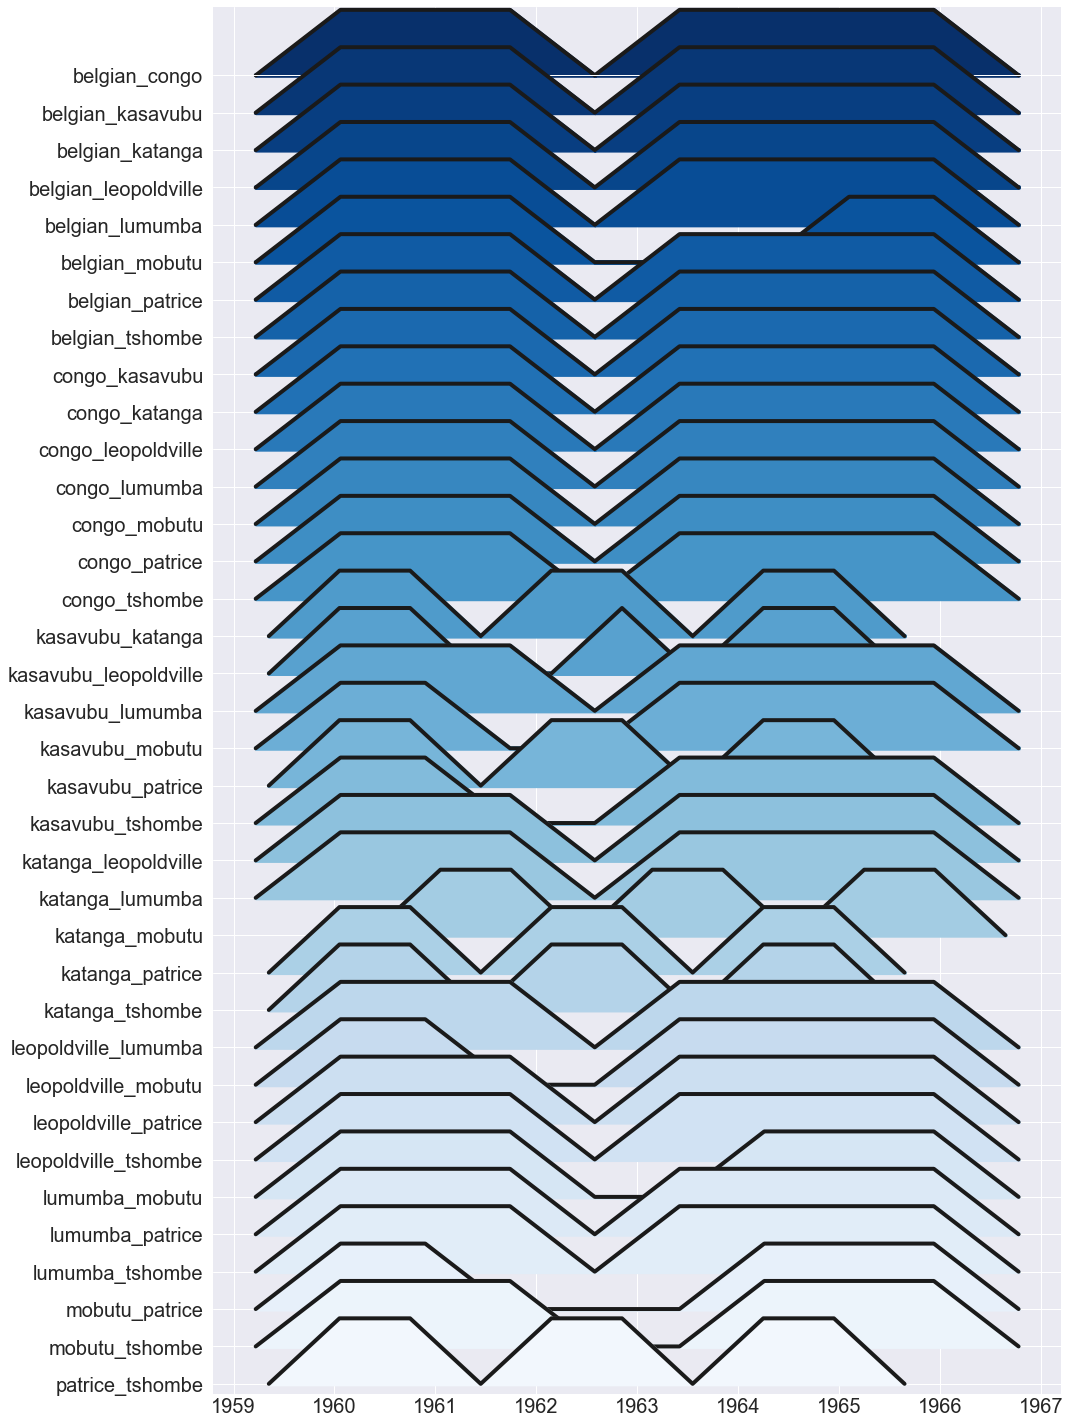

In [44]:
# fig.savefig('joyplot.png')
%matplotlib inline

fig1, axes = joypy.joyplot(all_combos2, by='terms', column='year', kind='counts', range_style='own', figsize=(15,20), grid='both', overlap=1, ylabelsize=20, xlabelsize=20, colormap=cm.Blues_r, linewidth=4)

In [45]:
fig1.savefig('joyplot_unique_freq.png')

In [32]:
len(all_combos), len(all_combos2)

(235, 235)

In [33]:
all_combos['type'] = 'unique_freq'
all_combos2['type'] = 'all_freq'

In [35]:
all_combos2.columns

Index(['year', 'source', 'target', 'count', 'terms', 'type'], dtype='object')

In [46]:
test = pd.merge(all_combos, all_combos2, on=['year', 'terms', 'source', 'target'] )
# test_melt = pd.melt(test, id_vars=['year', 'terms', 'source', 'target'])

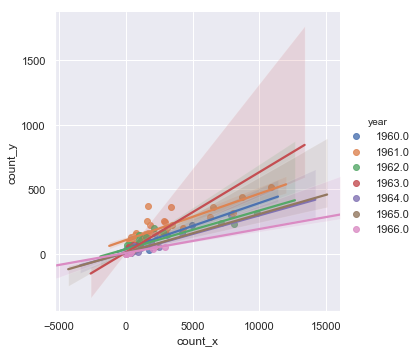

In [53]:
g = sns.lmplot(x="count_x", y="count_y", hue='year', data=test);

In [54]:
test

,year,source,target,count_x,terms,type_x,count_y,type_y
0,1960.0,congo,patrice,1168.0,congo_patrice,unique_freq,120.0,all_freq
1,1961.0,congo,patrice,3392.0,congo_patrice,unique_freq,360.0,all_freq
2,1962.0,congo,patrice,336.0,congo_patrice,unique_freq,72.0,all_freq
3,1963.0,congo,patrice,40.0,congo_patrice,unique_freq,10.0,all_freq
4,1964.0,congo,patrice,94.0,congo_patrice,unique_freq,12.0,all_freq
5,1965.0,congo,patrice,138.0,congo_patrice,unique_freq,14.0,all_freq
6,1966.0,congo,patrice,46.0,congo_patrice,unique_freq,8.0,all_freq
7,1960.0,lumumba,patrice,384.0,lumumba_patrice,unique_freq,120.0,all_freq
8,1961.0,lumumba,patrice,1664.0,lumumba_patrice,unique_freq,368.0,all_freq
9,1962.0,lumumba,patrice,120.0,lumumba_patrice,unique_freq,72.0,all_freq


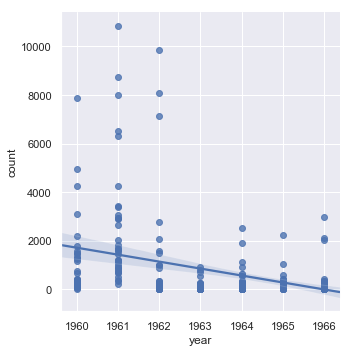

In [64]:
all_combos.year = all_combos.year.astype(int)
g = sns.lmplot(x="year", y='count',  data=all_combos);

In [59]:
all_combos.year.dtype

dtype('int64')

In [88]:
sum_combos =all_combos.groupby(['year','terms'])['count'].sum().reset_index()
sum_combos = sum_combos.sort_values(by=['count'])
# order = sum_combos.terms.tolist()
# all_combos['terms_cat'] = pd.Categorical(
#     all_combos['terms'], 
#     categories=order, 
#     ordered=True
# )
# all_combos = all_combos.sort_values(by=['terms_cat'])
# sum_combos
# all_combos.to_csv('terms_joyplot.csv')

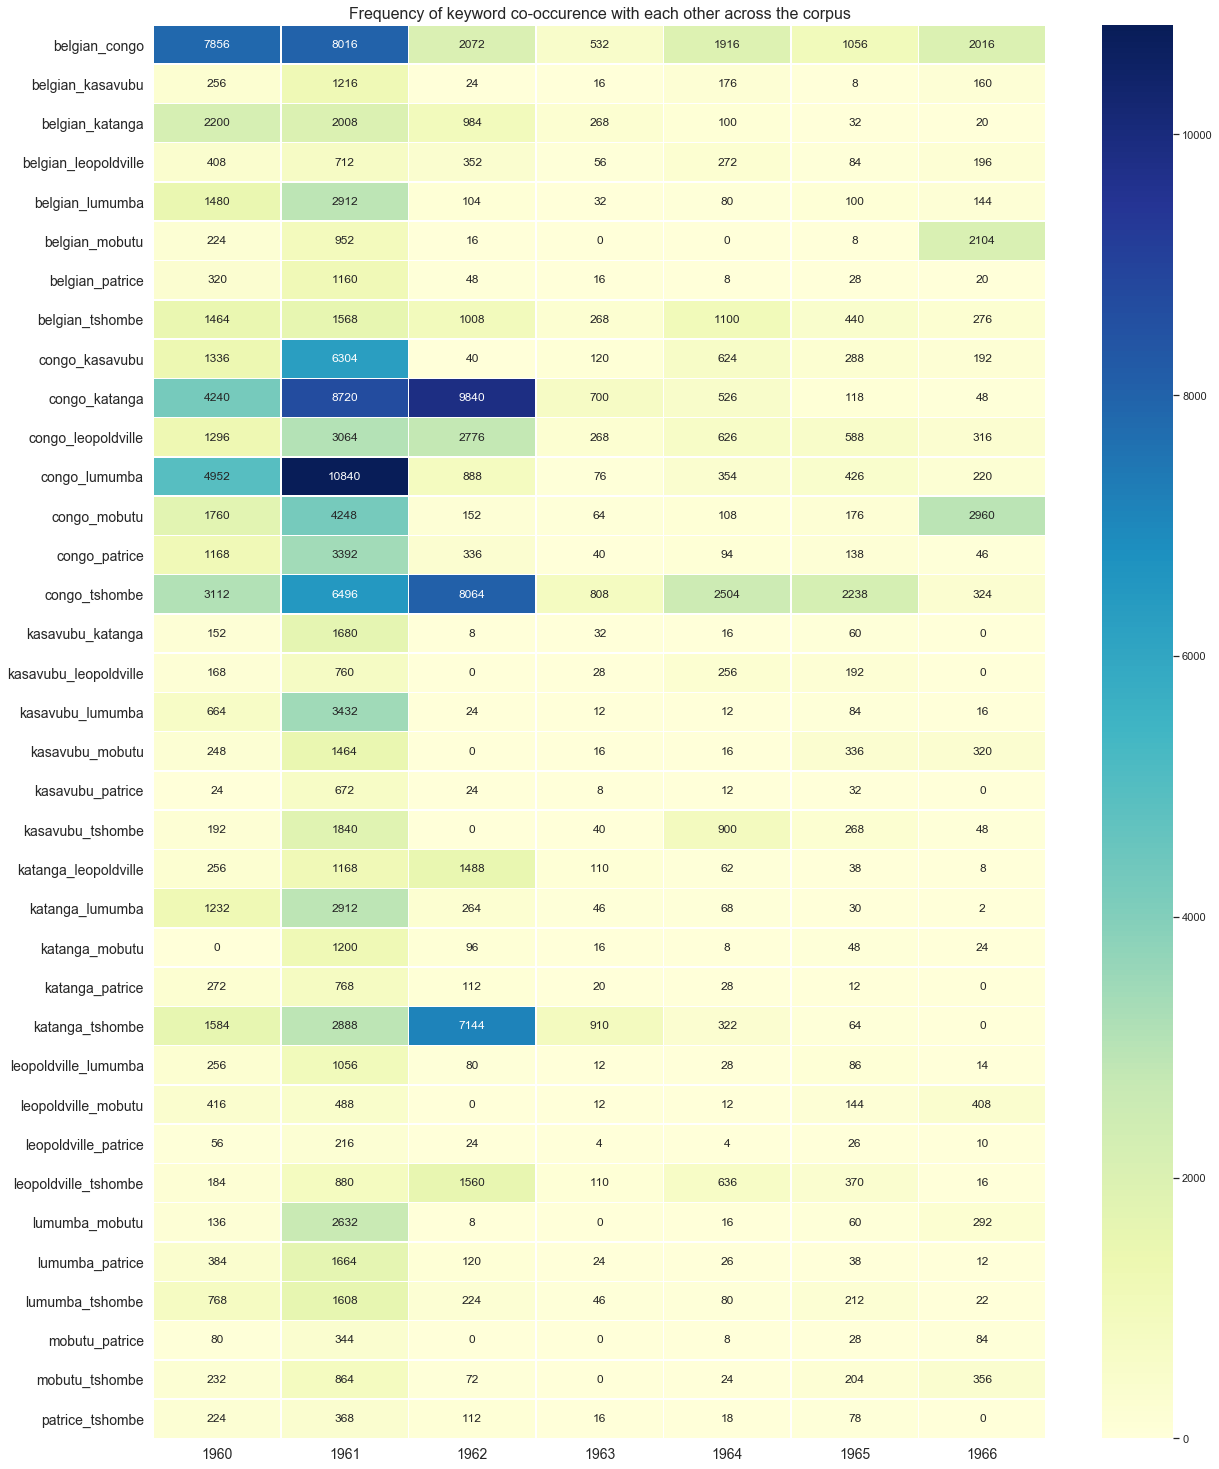

In [97]:
sum_combos.year = sum_combos.year.astype(int)
pi = pd.pivot_table(sum_combos, values='count', index=['terms'], columns=['year'], fill_value=0, aggfunc=np.sum)

# # plt.pcolor(pi)
# # plt.yticks(np.arange(0.5, len(pi.index), 1), pi.index)
# # plt.xticks(np.arange(0.5, len(pi.columns), 1), pi.columns)
plt.figure(figsize=(20, 26))
ax = plt.axes()
g = sns.heatmap(pi, ax=ax, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
ax.set_title('Frequency of keyword co-occurence with each other across the corpus', fontsize=16)

# # axes = g.axes.flatten()
# # axes[0].set_title('Correlation between Congo Crisis Keywords and Corpus Distributions over Time')
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(labelsize=14)

plt.savefig('congo_cooccurence_year_terms.png')
# plt.show()